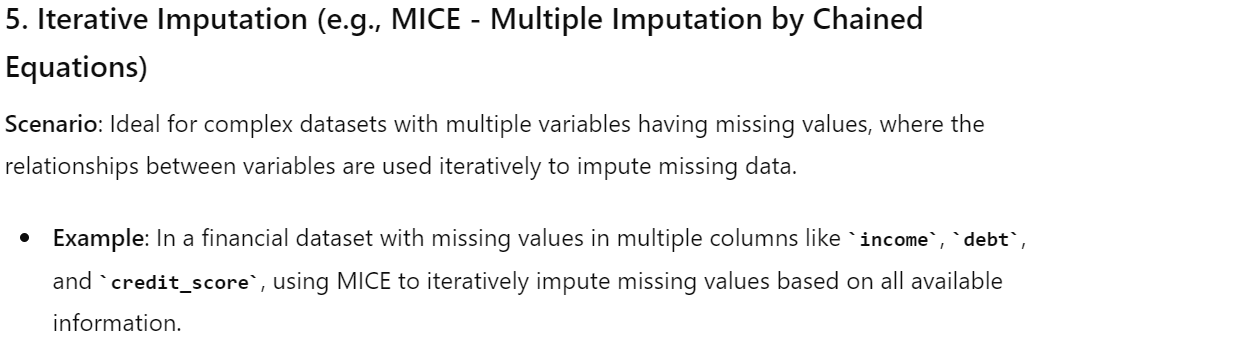

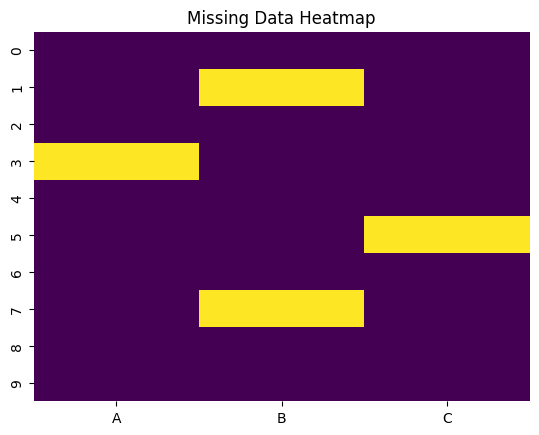

Original Data with Missing Values:
          A         B         C
0  0.548814  0.791725  0.978618
1  0.715189       NaN  0.799159
2  0.602763  0.568045  0.461479
3       NaN  0.925597  0.780529
4  0.423655  0.071036  0.118274
5  0.645894  0.087129       NaN
6  0.437587  0.020218  0.143353
7  0.891773       NaN  0.944669
8  0.963663  0.778157  0.521848
9  0.383442  0.870012  0.414662

Imputed Data:
          A         B         C
0  0.548814  0.791725  0.978618
1  0.715189  0.836793  0.799159
2  0.602763  0.568045  0.461479
3  0.681451  0.925597  0.780529
4  0.423655  0.071036  0.118274
5  0.645894  0.087129  0.229488
6  0.437587  0.020218  0.143353
7  0.891773  0.994828  0.944669
8  0.963663  0.778157  0.521848
9  0.383442  0.870012  0.414662


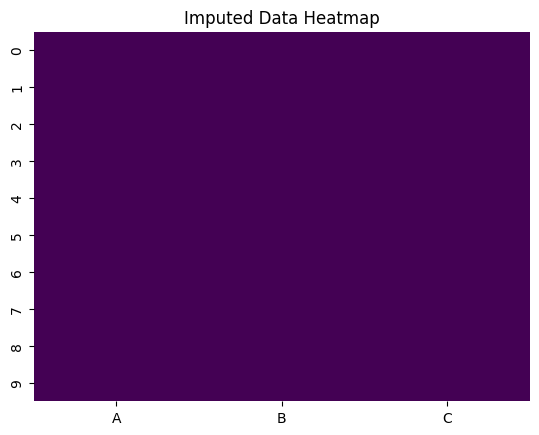

In [8]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Create sample dataset
np.random.seed(0)
data = pd.DataFrame({
    'A': np.random.rand(10),
    'B': np.random.rand(10),
    'C': np.random.rand(10)
})

# Introduce missing values
data.iloc[1, 1] = np.nan
data.iloc[3, 0] = np.nan
data.iloc[5, 2] = np.nan
data.iloc[7, 1] = np.nan

# Visualize missing data
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Apply Iterative Imputer
imputer = IterativeImputer(random_state=0)
imputed_data = imputer.fit_transform(data)
imputed_df = pd.DataFrame(imputed_data, columns=data.columns)

# Review imputed data
print("Original Data with Missing Values:")
print(data)
print("\nImputed Data:")
print(imputed_df)

# Visualize imputed data
sns.heatmap(imputed_df.isnull(), cbar=False, cmap='viridis')
plt.title('Imputed Data Heatmap')
plt.show()


In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create sample dataset with missing values
np.random.seed(0)
data = pd.DataFrame({
    'A': np.random.rand(10),
    'B': np.random.rand(10),
    'C': np.random.rand(10)
})

# Introduce missing values
data.iloc[1, 1] = np.nan
data.iloc[3, 0] = np.nan
data.iloc[5, 2] = np.nan
data.iloc[7, 1] = np.nan

# Function to perform mean imputation
def mean_imputation(df):
    return df.fillna(df.mean())

# Function to perform iterative imputation
def iterative_imputer(df, max_iter=10, tol=1e-6):
    df_imputed = mean_imputation(df.copy())
    previous_df = df_imputed.copy()
    
    for iteration in range(max_iter):
        for col in df.columns:
            # Separate the column to be imputed
            other_cols = df_imputed.columns.difference([col])
            known_values = df_imputed[df[col].notnull()]
            missing_values = df_imputed[df[col].isnull()]

            # Train regression model
            model = LinearRegression()
            model.fit(known_values[other_cols], known_values[col])

            # Predict missing values
            if not missing_values.empty:
                imputed_values = model.predict(missing_values[other_cols])
                df_imputed.loc[df[col].isnull(), col] = imputed_values

        # Check for convergence
        if np.allclose(df_imputed, previous_df, atol=tol):
            print(f"Converged after {iteration + 1} iterations")
            break
        previous_df = df_imputed.copy()

    return df_imputed

# Perform iterative imputation
imputed_data = iterative_imputer(data)
print("Original Data with Missing Values:")
print(data)
print("\nImputed Data:")
print(imputed_data)


Converged after 5 iterations
Original Data with Missing Values:
          A         B         C
0  0.548814  0.791725  0.978618
1  0.715189       NaN  0.799159
2  0.602763  0.568045  0.461479
3       NaN  0.925597  0.780529
4  0.423655  0.071036  0.118274
5  0.645894  0.087129       NaN
6  0.437587  0.020218  0.143353
7  0.891773       NaN  0.944669
8  0.963663  0.778157  0.521848
9  0.383442  0.870012  0.414662

Imputed Data:
          A         B         C
0  0.548814  0.791725  0.978618
1  0.715189  0.889638  0.799159
2  0.602763  0.568045  0.461479
3  0.717070  0.925597  0.780529
4  0.423655  0.071036  0.118274
5  0.645894  0.087129  0.179536
6  0.437587  0.020218  0.143353
7  0.891773  1.070454  0.944669
8  0.963663  0.778157  0.521848
9  0.383442  0.870012  0.414662
